# DATA PREP

In [ ]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 8.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=3a5a4e605c127dbbdf797e1da0fb7821844076ed0e26f416bd349022357bcb38
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

Load Data and Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from ISLP import load_data
Carseats=load_data ('Carseats')
Data=Carseats.head(300)

Explore Data

In [ ]:
# View first five rows
Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Encode Categorical Data

In [ ]:
encoded_data = pd.get_dummies(Data, columns=['ShelveLoc','Urban','US'],drop_first=True,dtype = int)
encoded_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


Missing Data

In [ ]:
# Iterate over every column and sum number of missing values
for col in encoded_data.columns:
    print(f"Missing = {sum(encoded_data[col].isna())}")

Missing = 0
Missing = 0
Missing = 0
Missing = 0
Missing = 0
Missing = 0
Missing = 0
Missing = 0
Missing = 0
Missing = 0
Missing = 0
Missing = 0


Correlation Analysis

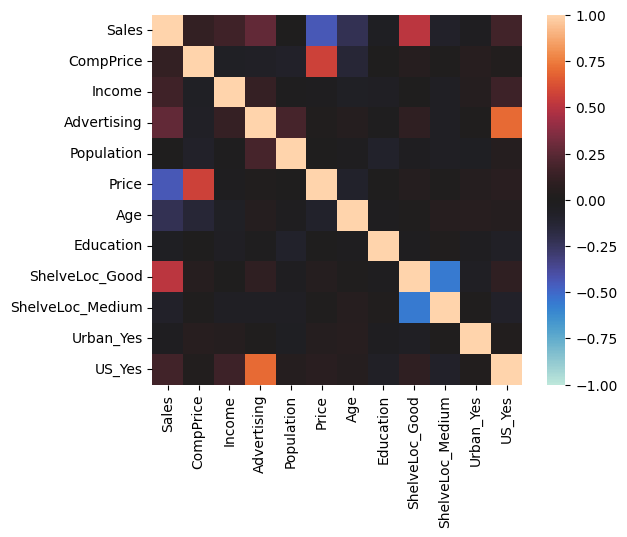

In [ ]:
Corr_Matrix = round(encoded_data.corr(),2)
axis_corr = sns.heatmap(
Corr_Matrix,
vmin=-1, vmax=1, center=0,
square=True
)

plt.show()

Exploratory Visualization

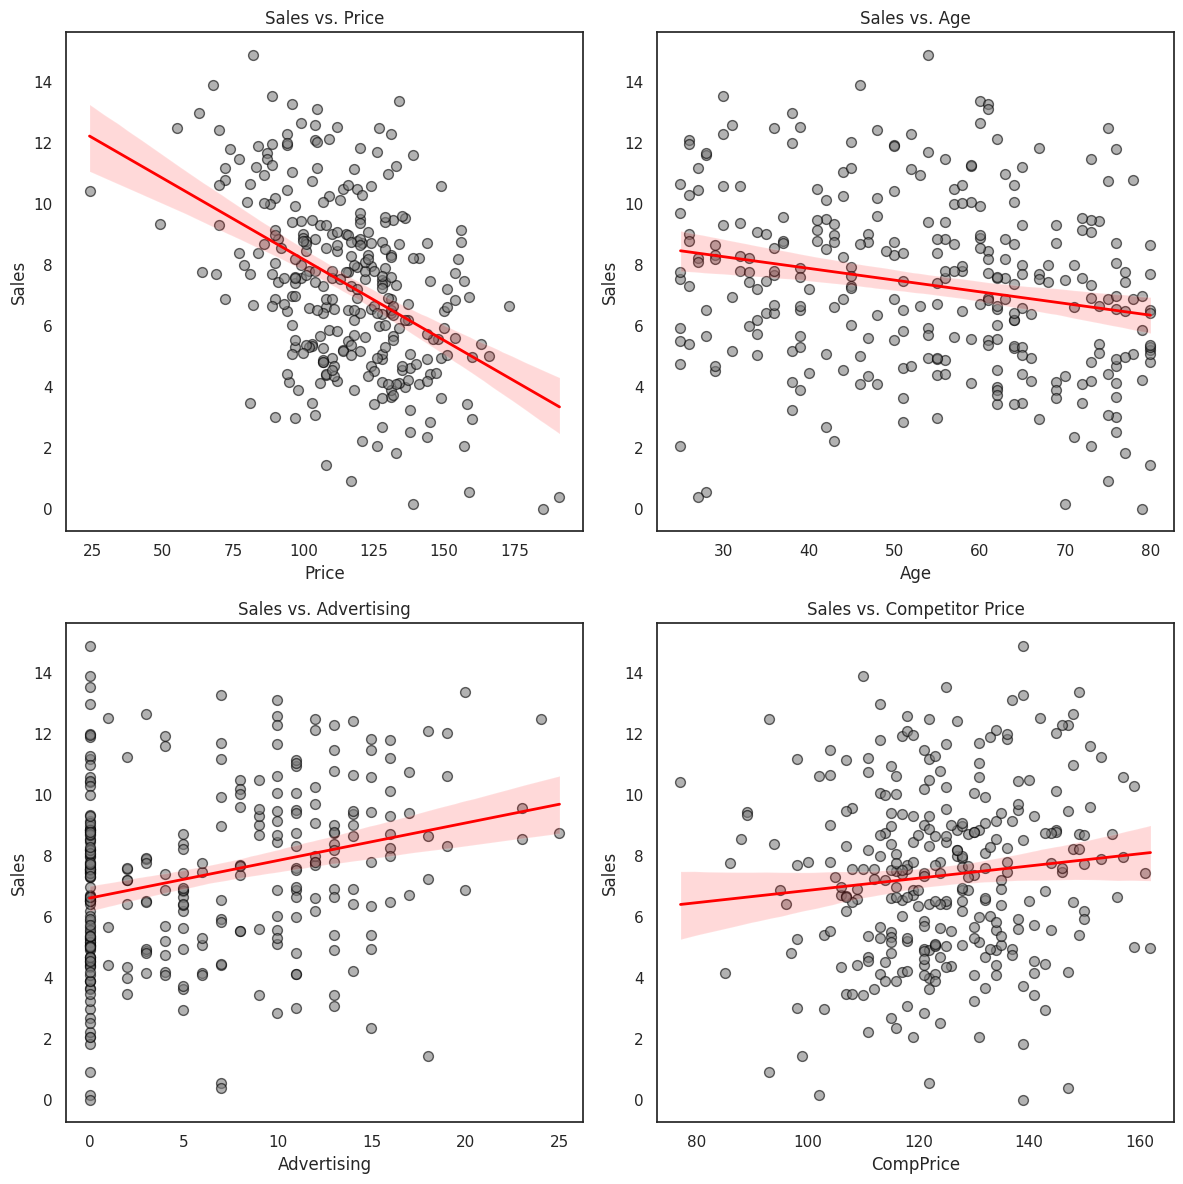

In [ ]:
# Set the theme for the plots
sns.set_theme(style='white', palette='muted')

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2,figsize = [12,12])  # 2x2 grid, adjust the size as needed

# Plot 1
sns.regplot(data=encoded_data, x="Price", y="Sales", ax=axes[0,0],
           line_kws={'color': 'red', 'lw': 2}, scatter_kws={'color': 'gray', 's': 50, 'edgecolor': 'black', 'alpha': 0.6})
axes[0,0].set_title("Sales vs. Price")

# Plot 2
sns.regplot(data=encoded_data, x="Age", y="Sales", ax=axes[0,1],
           line_kws={'color': 'red', 'lw': 2}, scatter_kws={'color': 'gray', 's': 50, 'edgecolor': 'black', 'alpha': 0.6})
axes[0,1].set_title("Sales vs. Age")

# Plot 3
sns.regplot(data=encoded_data, x="Advertising", y="Sales", ax=axes[1,0],
           line_kws={'color': 'red', 'lw': 2}, scatter_kws={'color': 'gray', 's': 50, 'edgecolor': 'black', 'alpha': 0.6})
axes[1,0].set_title("Sales vs. Advertising")

# Plot 4
sns.regplot(data=encoded_data, x="CompPrice", y="Sales", ax=axes[1,1],
           line_kws={'color': 'red', 'lw': 2}, scatter_kws={'color': 'gray', 's': 50, 'edgecolor': 'black', 'alpha': 0.6})
axes[1,1].set_title("Sales vs. Competitor Price")

# Adjust the layout for better spacing
plt.tight_layout()

# Show the figure with all subplots
plt.show()

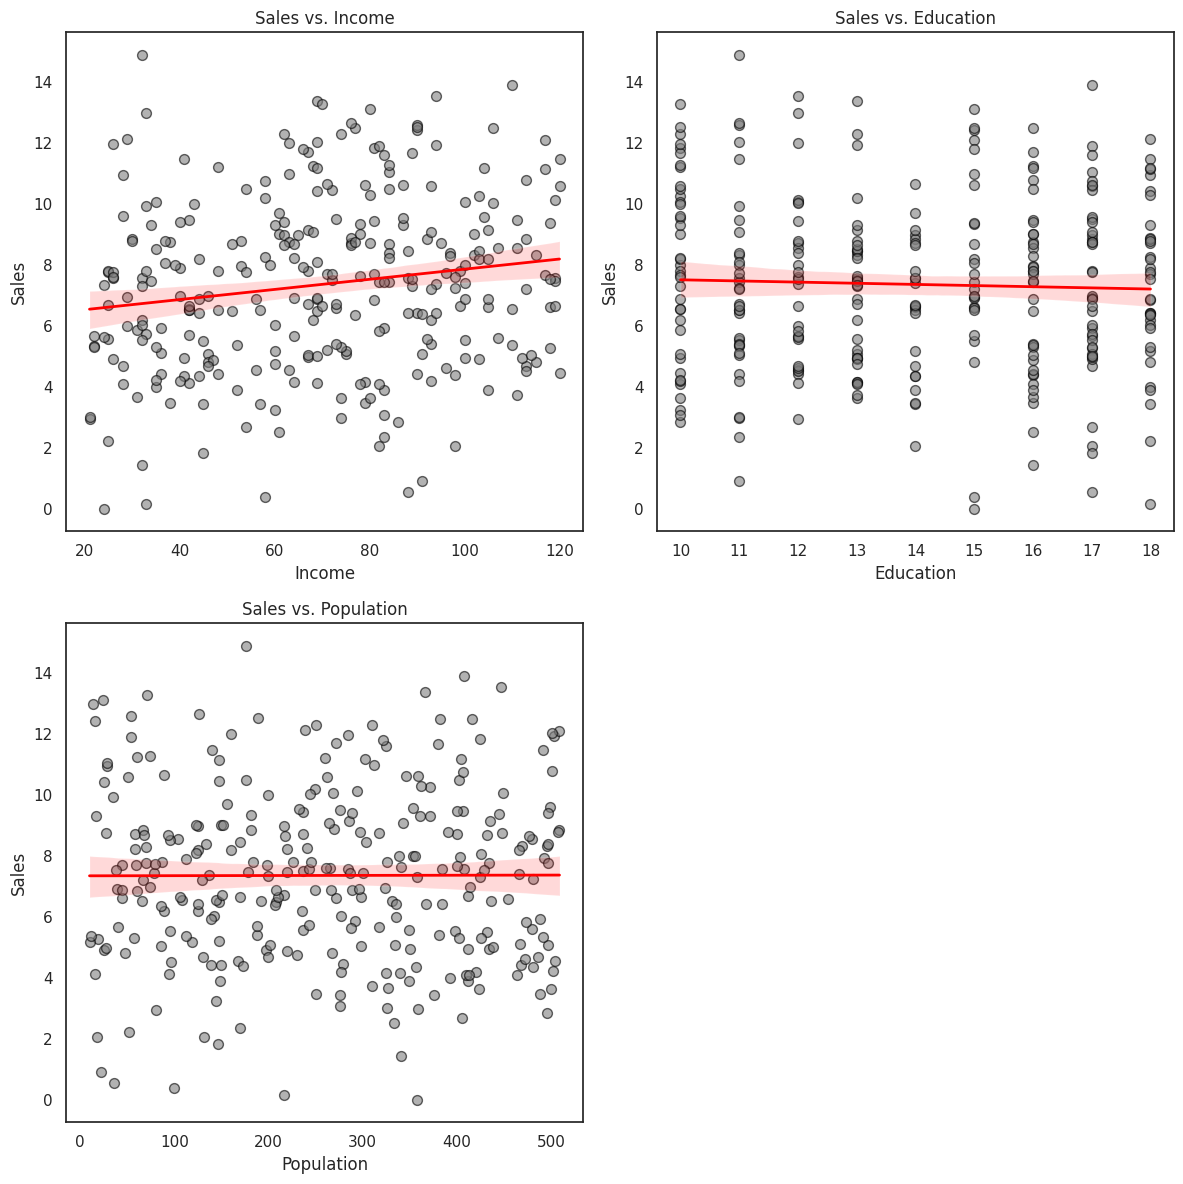

In [ ]:
# Set the theme for the plots
sns.set_theme(style='white', palette='muted')

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2,figsize = [12,12])  # 2x2 grid, adjust the size as needed

# Plot 1
sns.regplot(data=encoded_data, x="Income", y="Sales", ax=axes[0,0],
           line_kws={'color': 'red', 'lw': 2}, scatter_kws={'color': 'gray', 's': 50, 'edgecolor': 'black', 'alpha': 0.6})
axes[0,0].set_title("Sales vs. Income")

# Plot 2
sns.regplot(data=encoded_data, x="Education", y="Sales", ax=axes[0,1],
           line_kws={'color': 'red', 'lw': 2}, scatter_kws={'color': 'gray', 's': 50, 'edgecolor': 'black', 'alpha': 0.6})
axes[0,1].set_title("Sales vs. Education")

# Plot 3
sns.regplot(data=encoded_data, x="Population", y="Sales", ax=axes[1,0],
           line_kws={'color': 'red', 'lw': 2}, scatter_kws={'color': 'gray', 's': 50, 'edgecolor': 'black', 'alpha': 0.6})
axes[1,0].set_title("Sales vs. Population")

axes[1, 1].axis('off')
# Adjust the layout for better spacing
plt.tight_layout()

# Show the figure with all subplots
plt.show()

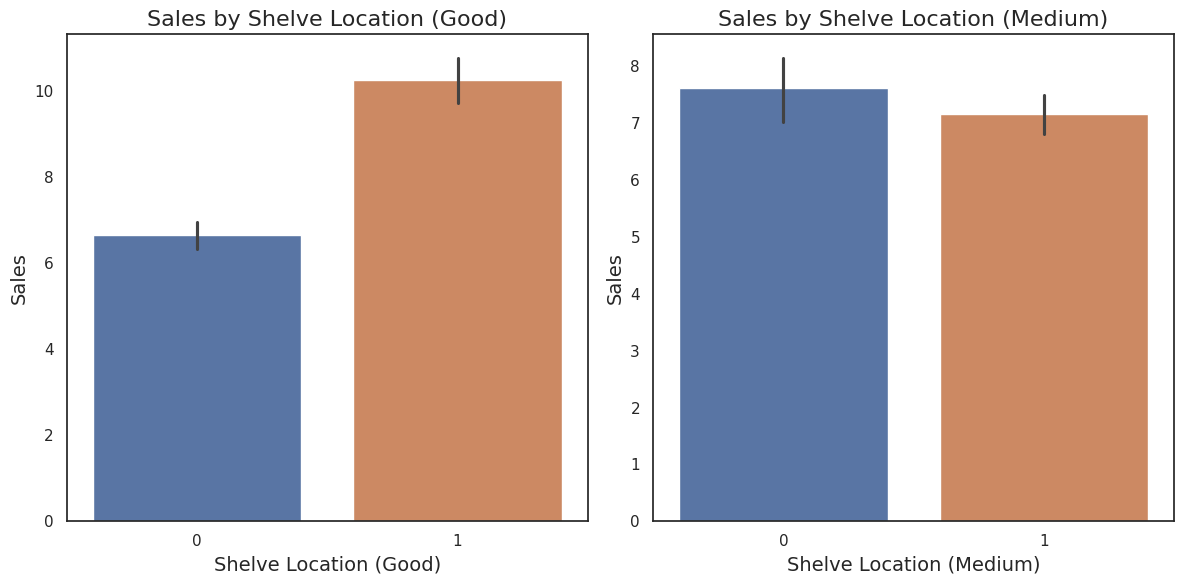

In [ ]:
# Create a more visually appealing barplot
sns.set_theme(style="white")  # Set the style for the plot
fig,axes = plt.subplots(1,2,figsize=(12,6))  # Customize the figure size

# Create the barplot with improved aesthetics
sns.barplot(data=encoded_data, x="ShelveLoc_Good", y="Sales", hue = "ShelveLoc_Good", ax = axes[0],legend=None)
axes[0].set_title("Sales by Shelve Location (Good)", fontsize=16)
axes[0].set_xlabel("Shelve Location (Good)", fontsize=14)
axes[0].set_ylabel("Sales", fontsize=14)

# Create the barplot with improved aesthetics
sns.barplot(data=encoded_data, x="ShelveLoc_Medium", y="Sales", hue = "ShelveLoc_Medium", ax = axes[1],legend=None)
axes[1].set_title("Sales by Shelve Location (Medium)", fontsize=16)
axes[1].set_xlabel("Shelve Location (Medium)", fontsize=14)
axes[1].set_ylabel("Sales", fontsize=14)
# Show the plot
plt.tight_layout()
plt.show()

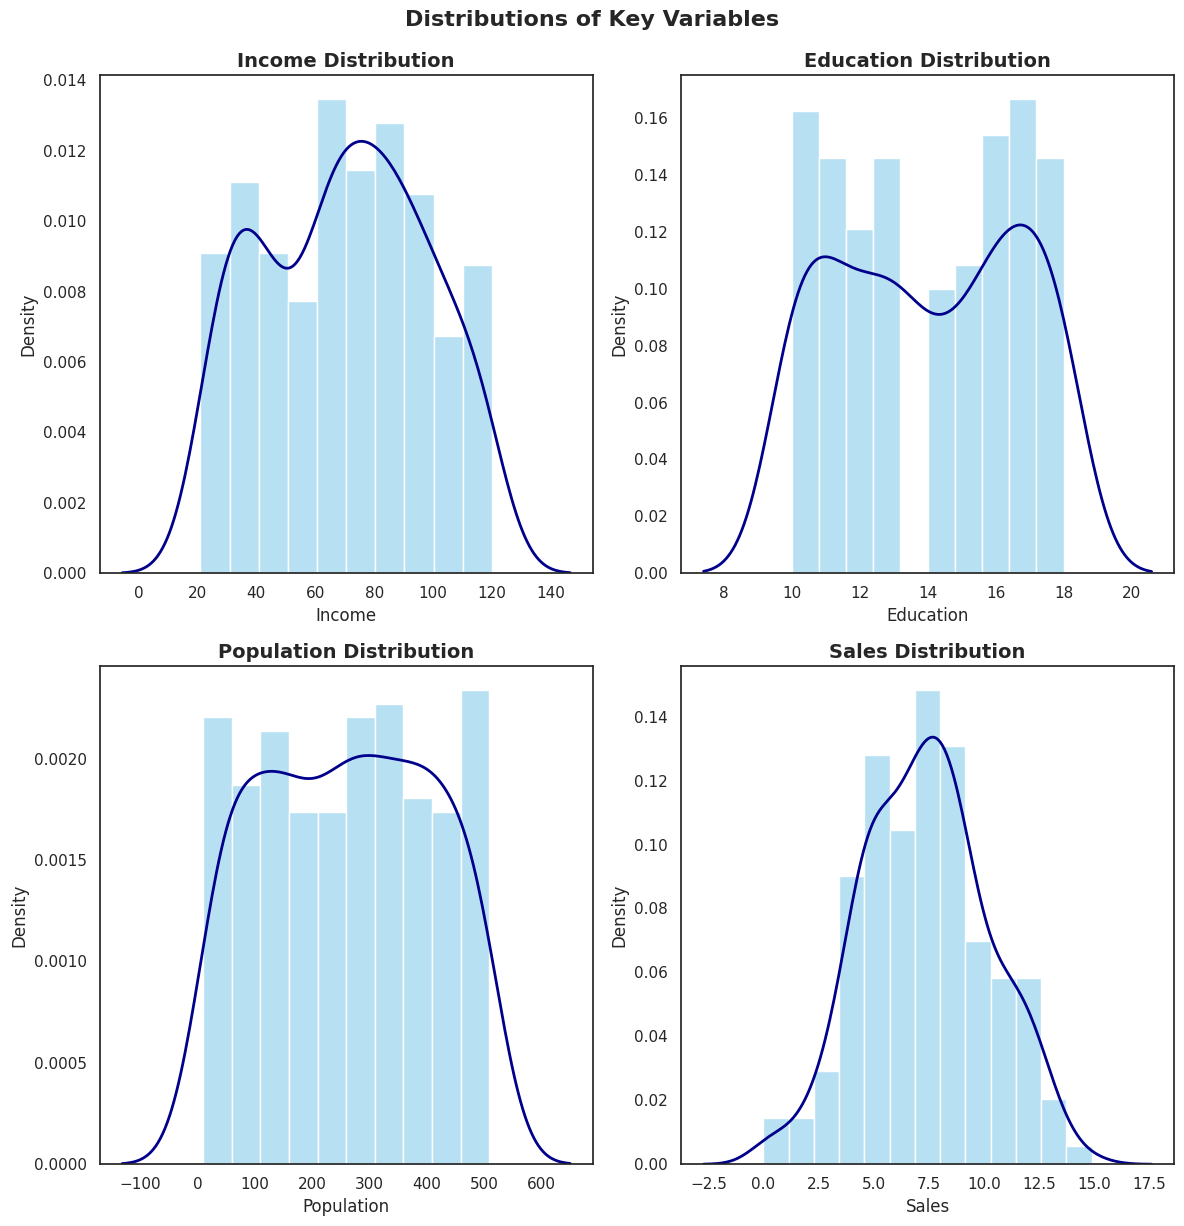

In [ ]:
# Set the theme for the plots
sns.set_theme(style='white', palette='muted')

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=[12, 12])  # 2x2 grid

# Shared styling
hist_kws = {'alpha': 0.6, 'color': 'skyblue'}
kde_kws = {'linewidth': 2, 'color': 'darkblue'}

# Plot 1: Income
sns.histplot(data=encoded_data, x="Income", stat="density", ax=axes[0, 0], **hist_kws)
sns.kdeplot(data=encoded_data, x="Income", ax=axes[0, 0], **kde_kws)
axes[0, 0].set_title("Income Distribution", fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel("Income", fontsize=12)
axes[0, 0].set_ylabel("Density", fontsize=12)

# Plot 2: Education
sns.histplot(data=encoded_data, x="Education", stat="density", ax=axes[0, 1], **hist_kws)
sns.kdeplot(data=encoded_data, x="Education", ax=axes[0, 1], **kde_kws)
axes[0, 1].set_title("Education Distribution", fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel("Education", fontsize=12)
axes[0, 1].set_ylabel("Density", fontsize=12)

# Plot 3: Population
sns.histplot(data=encoded_data, x="Population", stat="density", ax=axes[1, 0], **hist_kws)
sns.kdeplot(data=encoded_data, x="Population", ax=axes[1, 0], **kde_kws)
axes[1, 0].set_title("Population Distribution", fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel("Population", fontsize=12)
axes[1, 0].set_ylabel("Density", fontsize=12)

# Plot 4: Sales
sns.histplot(data=encoded_data, x="Sales", stat="density", ax=axes[1, 1], **hist_kws)
sns.kdeplot(data=encoded_data, x="Sales", ax=axes[1, 1], **kde_kws)
axes[1, 1].set_title("Sales Distribution", fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel("Sales", fontsize=12)
axes[1, 1].set_ylabel("Density", fontsize=12)

# Adjust spacing for better layout
plt.tight_layout()

# Add a main title
fig.suptitle("Distributions of Key Variables", fontsize=16, fontweight='bold', y=1.02)

# Show the plots
plt.show()


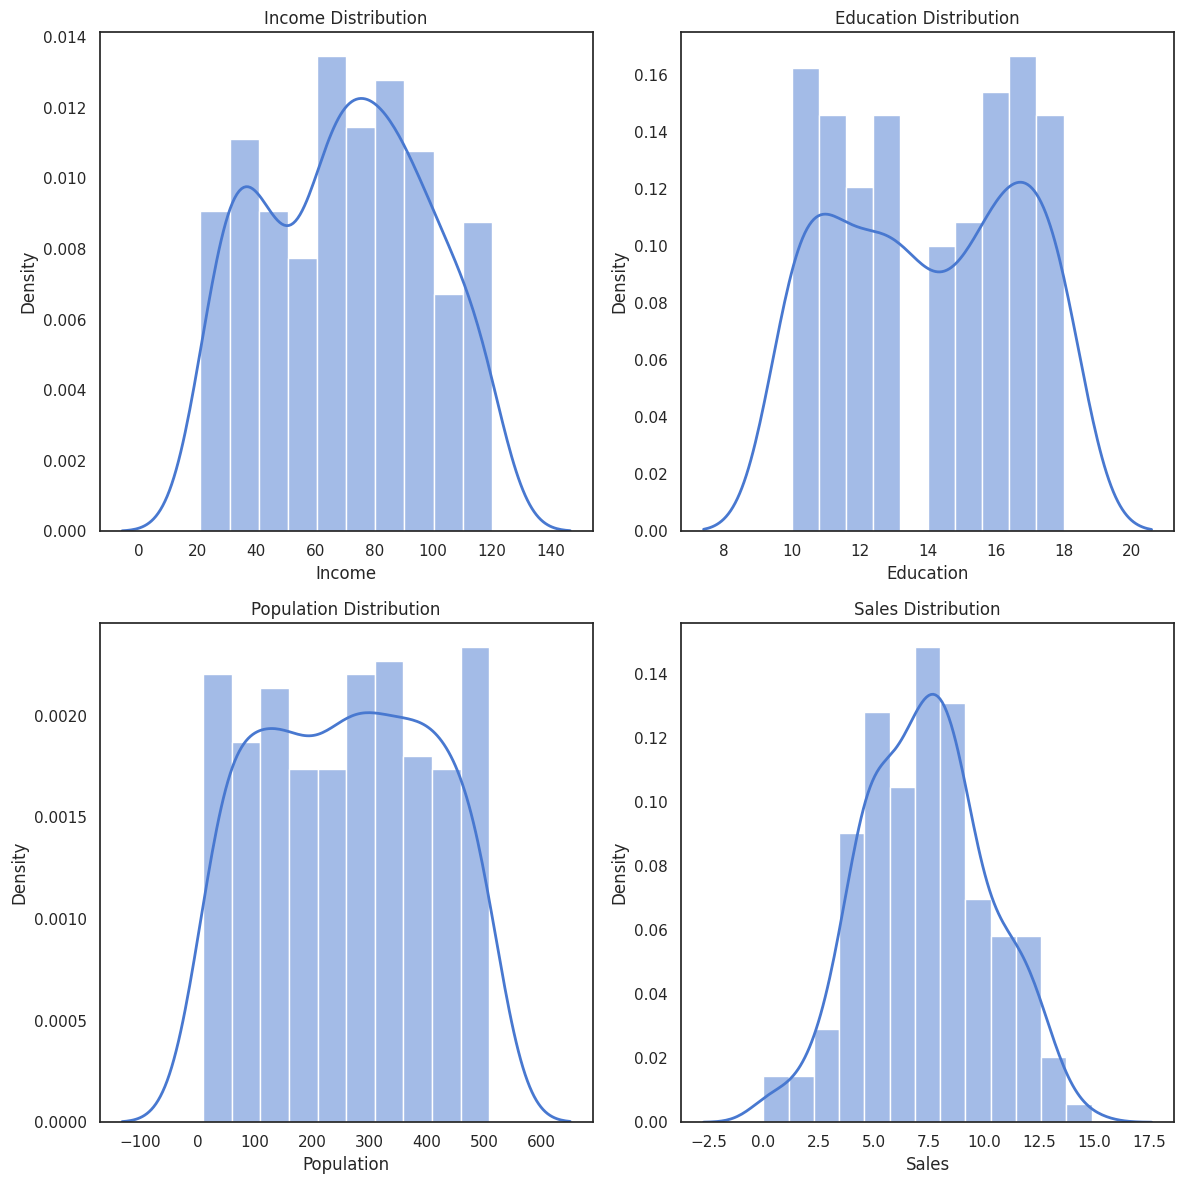

In [ ]:
# Set the theme for the plots
sns.set_theme(style='white', palette='muted')

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2,figsize = [12,12])  # 2x2 grid, adjust the size as needed

# Plot 1
sns.histplot(data=encoded_data, x="Income", stat="density",ax=axes[0,0], alpha = 0.5)
sns.kdeplot(data=encoded_data, x="Income", ax=axes[0,0], linewidth=2)
axes[0,0].set_title("Income Distribution")

# Plot 2
sns.histplot(data=encoded_data, x="Education", ax=axes[0,1], stat='density',alpha = 0.5)
sns.kdeplot(data=encoded_data, x="Education", ax=axes[0,1], linewidth=2)
axes[0,1].set_title("Education Distribution")

# Plot 3
sns.histplot(data=encoded_data, x="Population", ax=axes[1,0],stat='density',alpha = 0.5)
sns.kdeplot(data=encoded_data, x="Population", ax=axes[1,0], linewidth=2)
axes[1,0].set_title("Population Distribution")

# Plot 4
sns.histplot(data=encoded_data, x="Sales", ax=axes[1,1],stat='density',alpha = 0.5)
sns.kdeplot(data=encoded_data, x="Sales", ax=axes[1,1], linewidth=2)
axes[1,1].set_title("Sales Distribution")

# Adjust the layout for better spacing
plt.tight_layout()

# Show the figure with all subplots
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


X = encoded_data.drop(columns=['Sales'])  # Drop the target variable
y = encoded_data['Sales']

# Scale numerical features for consistency
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using ANOVA F-test (SelectKBest)
kbest = SelectKBest(score_func=f_regression, k='all')  # Evaluate all features
kbest.fit(X_scaled, y)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': kbest.scores_
}).sort_values(by='Score', ascending=False)

print("Feature Importance Scores Using F-test:")
print(feature_scores)

# Feature importance using Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_scaled, y)

# Extract feature importances
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance Using Random Forest:")
print(rf_feature_importance)



Feature Importance Scores Using F-test:
             Feature       Score
7     ShelveLoc_Good  105.273879
4              Price   73.395022
2        Advertising   23.923505
5                Age   15.319516
10            US_Yes    8.889369
1             Income    8.099178
0          CompPrice    3.551143
8   ShelveLoc_Medium    1.930754
6          Education    0.389525
9          Urban_Yes    0.256694
3         Population    0.001845

Feature Importance Using Random Forest:
             Feature  Importance
4              Price    0.287565
7     ShelveLoc_Good    0.258810
0          CompPrice    0.112077
5                Age    0.094046
2        Advertising    0.067349
1             Income    0.057886
8   ShelveLoc_Medium    0.046858
3         Population    0.040089
6          Education    0.025053
9          Urban_Yes    0.005997
10            US_Yes    0.004270


First Multiple Regression Model

In [ ]:
#Import necessary libraries that have not yet been imported
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Split the data into Features and the Target
X = encoded_data.drop(columns=['Sales'])  # Drop the target variable
y = encoded_data['Sales']

#Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Training the model
MultipleRegressionModel = LinearRegression()
MultipleRegressionModel.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Evaluating the Model
y_pred = MultipleRegressionModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.9871640679360462
R-squared: 0.8887071733128855


In [ ]:
#Analyzing Model Coefficients
coefficients = pd.DataFrame({'Feature': X.columns,
                             'Coefficient': MultipleRegressionModel.coef_
                             }).sort_values(by='Coefficient', ascending=False)
print(coefficients)

             Feature  Coefficient
7     ShelveLoc_Good     4.723014
8   ShelveLoc_Medium     1.835109
2        Advertising     0.145851
9          Urban_Yes     0.108787
0          CompPrice     0.096481
1             Income     0.016880
3         Population     0.000011
6          Education    -0.026340
5                Age    -0.043676
4              Price    -0.094666
10            US_Yes    -0.481165


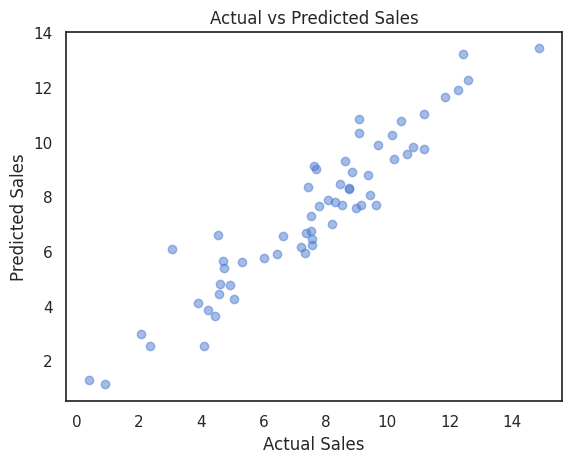

In [ ]:
#Scatterplot of the Results
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

Linear Regression Model with Lasso Constraint

In [ ]:
#Importing Lasso package
from sklearn.linear_model import Lasso

In [ ]:
#Spliting the data
X = encoded_data.drop(columns=['Sales'])
y = encoded_data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Training Lasso Regression Model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
#Evaluate the Model
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.4618977100873944
R-squared: 0.8351857267017276


In [ ]:
#Analyzing the Coefficients
lasso_coefficients = pd.DataFrame({'Feature': X.columns,
                                   'Coefficient': lasso_model.coef_
                                   }).sort_values(by='Coefficient', ascending=False)
print(lasso_coefficients)

             Feature  Coefficient
7     ShelveLoc_Good     3.291134
8   ShelveLoc_Medium     0.793524
2        Advertising     0.127543
0          CompPrice     0.097605
1             Income     0.016195
9          Urban_Yes     0.000000
10            US_Yes    -0.000000
3         Population    -0.000146
6          Education    -0.011558
5                Age    -0.040758
4              Price    -0.092631


In [ ]:
#Fine-Tune the Regularization
for alpha in [0.001, 0.01, 0.1, 1, 10]:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    print(f"Alpha: {alpha}")
    print(f"Number of Non-Zero Coefficients: {np.sum(lasso_model.coef_ != 0)}")
    print(f"R-squared: {lasso_model.score(X_test, y_test)}")
    print("-"*30)

Alpha: 0.001
Number of Non-Zero Coefficients: 11
R-squared: 0.8886398076823551
------------------------------
Alpha: 0.01
Number of Non-Zero Coefficients: 11
R-squared: 0.8876417883375163
------------------------------
Alpha: 0.1
Number of Non-Zero Coefficients: 9
R-squared: 0.8351857267017276
------------------------------
Alpha: 1
Number of Non-Zero Coefficients: 6
R-squared: 0.5092486392943354
------------------------------
Alpha: 10
Number of Non-Zero Coefficients: 5
R-squared: 0.2642852970116093
------------------------------


In [ ]:
# Train lasso model with alpha that has highest R-squared
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
#Evaluate the Best Lasso Model
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.9877615990784666
R-squared: 0.8886398076823551


In [ ]:
#Analyzing the Coefficients
lasso_coefficients = pd.DataFrame({'Feature': X.columns,
                                   'Coefficient': lasso_model.coef_
                                   }).sort_values(by='Coefficient', ascending=False)
print(lasso_coefficients)

             Feature  Coefficient
7     ShelveLoc_Good     4.708859
8   ShelveLoc_Medium     1.825205
2        Advertising     0.145431
9          Urban_Yes     0.104011
0          CompPrice     0.096496
1             Income     0.016875
3         Population     0.000011
6          Education    -0.026106
5                Age    -0.043635
4              Price    -0.094654
10            US_Yes    -0.472191


Gradient Boosting Regressor Model

In [ ]:
#Importing Library
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Splitting the Data
X = encoded_data.drop(columns=['Sales'])
y = encoded_data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Training the Model
gb_model = GradientBoostingRegressor(
    n_estimators=100,        # Number of boosting stages (trees)
    learning_rate=0.1,       # Shrinks the contribution of each tree
    max_depth=3,             # Maximum depth of each tree
    min_samples_split=10,    # Minimum samples to split a node
    min_samples_leaf=5,      # Minimum samples in a leaf node
    max_features='sqrt',     # Maximum number of features per tree
    random_state=42          # For reproducibility
)

# Fit the model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_features='sqrt', min_samples_leaf=5,
                          min_samples_split=10, random_state=42)

In [ ]:
#Evaluating the Model
y=pred=gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.4618977100873944
R-squared: 0.8351857267017276


In [ ]:
#Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

             Feature  Importance
4              Price    0.270623
7     ShelveLoc_Good    0.255827
0          CompPrice    0.126684
5                Age    0.101464
2        Advertising    0.084011
1             Income    0.071031
8   ShelveLoc_Medium    0.037088
3         Population    0.030742
6          Education    0.010276
9          Urban_Yes    0.006616
10            US_Yes    0.005637


In [ ]:
#Fine-Tuning Parameters
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'max_features': ['sqrt', 'log2']
}

# Grid Search with Gradient Boosting Regressor
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 200}


In [ ]:
#Training the Model
gb_model = GradientBoostingRegressor(
    n_estimators=200,        # Number of boosting stages (trees)
    learning_rate=0.05,       # Shrinks the contribution of each tree
    max_depth=4,             # Maximum depth of each tree
    min_samples_split=20,    # Minimum samples to split a node
    min_samples_leaf=5,      # Minimum samples in a leaf node
    max_features='sqrt',     # Maximum number of features per tree
    random_state=42          # For reproducibility
)

# Fit the model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='sqrt',
                          min_samples_leaf=5, min_samples_split=20,
                          n_estimators=200, random_state=42)

In [ ]:
#Evaluating the Model
y=pred=gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.9877615990784666
R-squared: 0.8886398076823551


In [ ]:
#Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

             Feature  Importance
4              Price    0.278967
7     ShelveLoc_Good    0.236443
0          CompPrice    0.121437
5                Age    0.098953
2        Advertising    0.089572
1             Income    0.071678
3         Population    0.039961
8   ShelveLoc_Medium    0.039397
6          Education    0.013843
9          Urban_Yes    0.006835
10            US_Yes    0.002914


In [ ]:
#Split the data into Features and the Target
X = encoded_data.drop(columns=['Sales','US_Yes','Urban_Yes','Education','Population','Income','Age'])  # Drop the target variable
y = encoded_data['Sales']

#Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Training the model
MultipleRegressionModel = LinearRegression()
MultipleRegressionModel.fit(X_train, y_train)

# 2. Add a constant (intercept) to the feature matrix for statsmodels
X_train_sm = sm.add_constant(X_train)

# 3. Fit the OLS model using statsmodels
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print the summary with robust standard errors
# Use 'HC3' for heteroscedasticity-consistent robust standard errors
robust_summary = ols_model.get_robustcov_results(cov_type='HC3')

# Print the summary with robust standard errors
print(robust_summary.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     147.2
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           3.64e-70
Time:                        21:43:29   Log-Likelihood:                -402.24
No. Observations:                 240   AIC:                             816.5
Df Residuals:                     234   BIC:                             837.4
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.0299      0.741  

In [ ]:
# Add a constant to the new data for prediction
X_test = sm.add_constant(X_test)

# Make predictions on training data
y_pred = ols_model.predict(X_test)

# Evaluate performance
# R-squared (R²)
r_squared = ols_model.rsquared

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("R-squared: ", r_squared)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)

R-squared:  0.7850997754624409
Mean Squared Error (MSE):  1.690654709399806
Root Mean Squared Error (RMSE):  1.3002517869242889
Mean Absolute Error (MAE):  0.9904444563607016


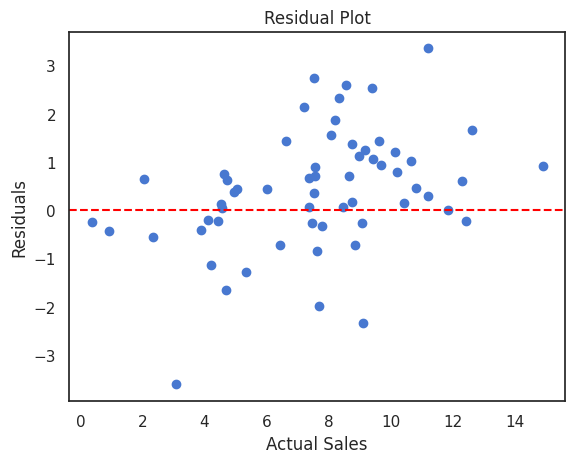

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

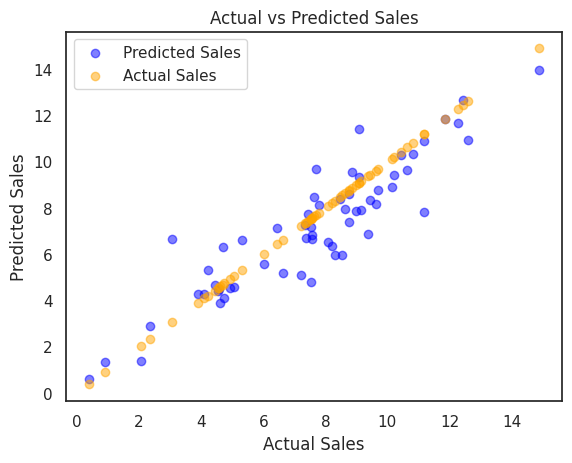

In [ ]:
# Scatter plot for y_test (Actual Sales) in a different color
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted Sales')

# Highlight y_test (Actual Sales) in a different color
plt.scatter(y_test, y_test, alpha=0.5, color='orange', label='Actual Sales')

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()


# Interpreting the Results

The analysis of the Carseats dataset revealed key factors in the determinants of sales. Through exploratory data analysis and feature selection, we found that variables such as shelving location quality, price, advertising budget, and competitor pricing proved to be influential predictors of sales. The bar plots illustrate the significant impact of shelving location, with stores having "Good" or "Medium" shelving positions showing higher sales. There were also linear relationships observed between sales and variables like price and advertising, as demonstrated in scatterplots and correlation matrices. Feature selection methods, including ANOVA F-tests and Random Forest, confirmed the importance of these predictors. The use of multiple regression models provided a comprehensive understanding of these relationships. The baseline linear regression offered interpretable coefficients, and the LASSO regression included regularization, placing emphasis on the most relevant features by removing the less impactful ones. Gradient Boosting Regressor, with the ability to model complex non-linear interactions, performed well with the support of GridSearchCV's fine-tuned parameters. Its feature importance rankings aligned with the earlier findings, confirming shelving location and pricing strategies as key drivers. Overall, the models suggest that focusing on strategic pricing, a focus on shelving locations, and leveraging targeted advertising would significantly improve sales figures.

Furthermore, we decided to go back and select which of variables were most important in predicting our results. By using only these variables we were able to conduct another linear regression using these most important variables, seeing how it compares to our previous model. From here, we ran an OLS regression model, where we can see our R-squared value is a .785, showing that our model accounts for 78.5% of the variance found in sales. Our Adjusted R Squared confirms that the predictors we selected are indeed the most meaningful, as its value is nearly the same as our R-Square. Also not our very small p-value, further confirming the importance in our predictors. We then also have the coeffecients for each variable we chose to include, showing that having a good shelve location significantly increases our sales. Price also shows impact, but this is expected. Finally we ran both a residual and Actual versus Predicted plot to further explain our findings. We see that our residual plot has no real clumps and are randomly scattered around our 0, which is important in avoiding a bias. Our actual vs predicted plot then clearly shows the results of our findings. You can see that at a low level, we are very accurate at predicting sales before getting slightly more inaccurate as sales increase, and becoming again accurate at a high level. Overall we are content with our spread, and satisfied with the current models ability to predict sales. In future analysis, we might dive more into addressing possible signs of multicollinearity and possibly diving deeper into shelve location to find more information. Perhaps exploring more specifics behind the shelve location, discovering product presentation, shelve layout, or even product lighting, all possible answers for why product placement is so important.


